In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
train = pd.read_csv('train.csv')
train.describe()



,condition,length(m),height(cm),X1,X2,breed_category,pet_category
count,17357.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000
mean,0.883390,0.502636,27.448832,5.369598,4.577307,0.600563,1.709143
std,0.770434,0.288705,13.019781,6.572366,3.517763,0.629883,0.717919
min,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,16.172500,0.000000,1.000000,0.000000,1.000000
50%,1.000000,0.500000,27.340000,0.000000,4.000000,1.000000,2.000000
75%,1.000000,0.760000,38.890000,13.000000,9.000000,1.000000,2.000000
max,2.000000,1.000000,50.000000,19.000000,9.000000,2.000000,4.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pet_id          18834 non-null  object 
 1   issue_date      18834 non-null  object 
 2   listing_date    18834 non-null  object 
 3   condition       17357 non-null  float64
 4   color_type      18834 non-null  object 
 5   length(m)       18834 non-null  float64
 6   height(cm)      18834 non-null  float64
 7   X1              18834 non-null  int64  
 8   X2              18834 non-null  int64  
 9   breed_category  18834 non-null  float64
 10  pet_category    18834 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 1.6+ MB


In [ ]:
train.drop(['pet_id', 'issue_date', 'listing_date'],axis = 1,inplace = True)

In [ ]:
train['condition'] = train['condition'].fillna(train['condition'].mean())

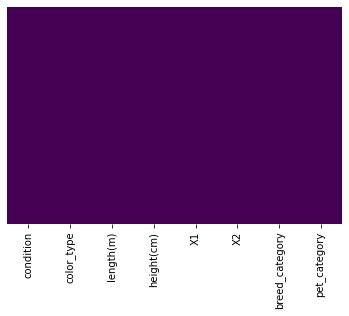

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   condition       18834 non-null  float64
 1   color_type      18834 non-null  object 
 2   length(m)       18834 non-null  float64
 3   height(cm)      18834 non-null  float64
 4   X1              18834 non-null  int64  
 5   X2              18834 non-null  int64  
 6   breed_category  18834 non-null  float64
 7   pet_category    18834 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 1.1+ MB


In [ ]:
color_type1 = pd.get_dummies(train['color_type'])
train.drop('color_type',axis  =1,inplace = True)
Y1 = train['breed_category']
Y2 = train['pet_category']
X = train.drop(['pet_category','breed_category'],axis = 1)
X = pd.concat([X,color_type1],axis = 1)

In [ ]:
X.shape

(18834, 61)

In [ ]:
Y1.shape

(18834,)

In [ ]:
X = np.array(X)
Y2 = np.array(Y2)
Y2 = Y2.reshape(-1,1)
Y2.shape
X_train,X_test,Y_train,Y_test = train_test_split(X,Y2,test_size = 0.2)

class mycallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs = {}):
    if logs.get('accuracy')>0.915 :
      print('91.5% ACCURACY REACHED STOPPING NOW!')
      self.model.stop_training = True
callbaccks = mycallbacks()

In [ ]:
model = tf.keras.models.Sequential([
                                   tf.keras.layers.Dense(128,activation  ='relu',input_shape = (1,61)),
                                   tf.keras.layers.Dense(128,activation = 'relu'),
                                   tf.keras.layers.Dense(1024,activation = 'relu'),
                                   tf.keras.layers.Dense(5,activation = 'softmax')
                            
])
model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.0001),loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
history = model.fit(X,Y2,epochs = 100,verbose = 2,callbacks=[callbacks])
model.summary()

Epoch 1/100
589/589 - 2s - loss: 0.7376 - accuracy: 0.6823
Epoch 2/100
589/589 - 2s - loss: 0.4919 - accuracy: 0.8252
Epoch 3/100
589/589 - 2s - loss: 0.4072 - accuracy: 0.8425
Epoch 4/100
589/589 - 2s - loss: 0.3856 - accuracy: 0.8451
Epoch 5/100
589/589 - 2s - loss: 0.3704 - accuracy: 0.8520
Epoch 6/100
589/589 - 2s - loss: 0.3646 - accuracy: 0.8530
Epoch 7/100
589/589 - 2s - loss: 0.3580 - accuracy: 0.8520
Epoch 8/100
589/589 - 2s - loss: 0.3552 - accuracy: 0.8515
Epoch 9/100
589/589 - 2s - loss: 0.3534 - accuracy: 0.8526
Epoch 10/100
589/589 - 2s - loss: 0.3433 - accuracy: 0.8562
Epoch 11/100
589/589 - 2s - loss: 0.3437 - accuracy: 0.8544
Epoch 12/100
589/589 - 2s - loss: 0.3388 - accuracy: 0.8598
Epoch 13/100
589/589 - 2s - loss: 0.3347 - accuracy: 0.8592
Epoch 14/100
589/589 - 2s - loss: 0.3329 - accuracy: 0.8604
Epoch 15/100
589/589 - 2s - loss: 0.3322 - accuracy: 0.8592
Epoch 16/100
589/589 - 2s - loss: 0.3284 - accuracy: 0.8610
Epoch 17/100
589/589 - 2s - loss: 0.3273 - accura

KeyboardInterrupt: ignored

In [ ]:
Y1 = np.array(Y1)
Y1 = Y1.reshape(-1,1)
Y1.shape
X_train,X_test,Y_train,Y_test = train_test_split(X,Y1,test_size = 0.2)

model1 = tf.keras.models.Sequential([
                                   tf.keras.layers.Dense(128,activation  ='relu',input_shape = (1,61)),
                                   tf.keras.layers.Dense(128,activation = 'relu'),
                                   tf.keras.layers.Dense(1024,activation = 'relu'),
                                   tf.keras.layers.Dense(3,activation = 'softmax')
                            
])
model1.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
history = model1.fit(X,Y1,epochs = 1000)
model1.summary()

Epoch 1/1000
589/589 [==============================] - 2s 4ms/step - loss: 0.4710 - accuracy: 0.7866
Epoch 2/1000
589/589 [==============================] - 3s 5ms/step - loss: 0.2687 - accuracy: 0.8530
Epoch 3/1000
589/589 [==============================] - 3s 5ms/step - loss: 0.2456 - accuracy: 0.8619
Epoch 4/1000
589/589 [==============================] - 2s 4ms/step - loss: 0.2327 - accuracy: 0.8716
Epoch 5/1000
589/589 [==============================] - 2s 3ms/step - loss: 0.2213 - accuracy: 0.8729
Epoch 6/1000
589/589 [==============================] - 3s 4ms/step - loss: 0.2117 - accuracy: 0.8803
Epoch 7/1000
589/589 [==============================] - 3s 5ms/step - loss: 0.2038 - accuracy: 0.8828
Epoch 8/1000
589/589 [==============================] - 2s 4ms/step - loss: 0.1963 - accuracy: 0.8841
Epoch 9/1000
589/589 [==============================] - 3s 5ms/step - loss: 0.1903 - accuracy: 0.8883
Epoch 10/1000
589/589 [==============================] - 2s 4ms/step - loss: 0.187

In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
X_pred = test.drop(['pet_id', 'issue_date', 'listing_date'],axis = 1)

In [ ]:
color_type = pd.get_dummies(X_pred['color_type'])
X_pred.drop('color_type',axis  =1,inplace = True)


In [ ]:
X_pred

,condition,length(m),height(cm),X1,X2
0,0.0,0.87,42.73,0,7
1,1.0,0.06,6.71,0,1
2,1.0,0.24,41.21,0,7
3,1.0,0.29,8.46,7,1
4,1.0,0.71,30.92,0,7
...,...,...,...,...,...
8067,2.0,0.82,36.08,13,9
8068,0.0,0.49,27.54,13,9
8069,0.0,0.98,37.19,0,7
8070,NaN,0.79,23.83,0,2


In [ ]:
col1 = color_type1.columns

In [ ]:
col2  =color_type.columns

In [ ]:
diff = [col for col in col1 if col not in col2]
diff

['Black Tiger', 'Brown Tiger']

In [ ]:
color_type1

,Agouti,Apricot,Black,Black Brindle,Black Smoke,Black Tabby,Black Tiger,Blue,Blue Cream,Blue Merle,Blue Point,Blue Smoke,Blue Tabby,Blue Tick,Blue Tiger,Brown,Brown Brindle,Brown Merle,Brown Tabby,Brown Tiger,Buff,Calico,Calico Point,Chocolate,Chocolate Point,Cream,Cream Tabby,Fawn,Flame Point,Gold,Gray,Gray Tabby,Green,Lilac Point,Liver,Liver Tick,Lynx Point,Orange,Orange Tabby,Pink,Red,Red Merle,Red Tick,Sable,Seal Point,Silver,Silver Lynx Point,Silver Tabby,Tan,Torbie,Tortie,Tortie Point,Tricolor,White,Yellow,Yellow Brindle
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18829,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
18830,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18831,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18832,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
color_type

,Agouti,Apricot,Black,Black Brindle,Black Smoke,Black Tabby,Blue,Blue Cream,Blue Merle,Blue Point,Blue Smoke,Blue Tabby,Blue Tick,Blue Tiger,Brown,Brown Brindle,Brown Merle,Brown Tabby,Buff,Calico,Calico Point,Chocolate,Chocolate Point,Cream,Cream Tabby,Fawn,Flame Point,Gold,Gray,Gray Tabby,Green,Lilac Point,Liver,Liver Tick,Lynx Point,Orange,Orange Tabby,Pink,Red,Red Merle,Red Tick,Sable,Seal Point,Silver,Silver Lynx Point,Silver Tabby,Tan,Torbie,Tortie,Tortie Point,Tricolor,White,Yellow,Yellow Brindle
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8067,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8068,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8069,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8070,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
color_type.columns

Index(['Agouti', 'Apricot', 'Black', 'Black Brindle', 'Black Smoke',
       'Black Tabby', 'Blue', 'Blue Cream', 'Blue Merle', 'Blue Point',
       'Blue Smoke', 'Blue Tabby', 'Blue Tick', 'Blue Tiger', 'Brown',
       'Brown Brindle', 'Brown Merle', 'Brown Tabby', 'Buff', 'Calico',
       'Calico Point', 'Chocolate', 'Chocolate Point', 'Cream', 'Cream Tabby',
       'Fawn', 'Flame Point', 'Gold', 'Gray', 'Gray Tabby', 'Green',
       'Lilac Point', 'Liver', 'Liver Tick', 'Lynx Point', 'Orange',
       'Orange Tabby', 'Pink', 'Red', 'Red Merle', 'Red Tick', 'Sable',
       'Seal Point', 'Silver', 'Silver Lynx Point', 'Silver Tabby', 'Tan',
       'Torbie', 'Tortie', 'Tortie Point', 'Tricolor', 'White', 'Yellow',
       'Yellow Brindle'],
      dtype='object')

In [ ]:
pt1 = color_type[['Agouti', 'Apricot', 'Black', 'Black Brindle', 'Black Smoke','Black Tabby']]
pt2 = color_type[['Blue', 'Blue Cream', 'Blue Merle', 'Blue Point','Blue Smoke', 'Blue Tabby', 'Blue Tick', 'Blue Tiger', 'Brown','Brown Brindle', 'Brown Merle', 'Brown Tabby']]
pt3 = color_type[['Buff', 'Calico','Calico Point', 'Chocolate', 'Chocolate Point', 'Cream', 'Cream Tabby',
       'Fawn', 'Flame Point', 'Gold', 'Gray', 'Gray Tabby', 'Green',
       'Lilac Point', 'Liver', 'Liver Tick', 'Lynx Point', 'Orange',
       'Orange Tabby', 'Pink', 'Red', 'Red Merle', 'Red Tick', 'Sable',
       'Seal Point', 'Silver', 'Silver Lynx Point', 'Silver Tabby', 'Tan',
       'Torbie', 'Tortie', 'Tortie Point', 'Tricolor', 'White', 'Yellow',
       'Yellow Brindle']]


In [ ]:
s1 = pd.DataFrame(np.zeros((8072,1)))
s2 = pd.DataFrame(np.zeros((8072,1)))

In [ ]:
X_pred = pd.concat([X_pred,pt1,s1,pt2,s2,pt3],axis = 1)


In [ ]:
X_pred

,condition,length(m),height(cm),X1,X2,Agouti,Apricot,Black,Black Brindle,Black Smoke,Black Tabby,0,Blue,Blue Cream,Blue Merle,Blue Point,Blue Smoke,Blue Tabby,Blue Tick,Blue Tiger,Brown,Brown Brindle,Brown Merle,Brown Tabby,0,Buff,Calico,Calico Point,Chocolate,Chocolate Point,Cream,Cream Tabby,Fawn,Flame Point,Gold,Gray,Gray Tabby,Green,Lilac Point,Liver,Liver Tick,Lynx Point,Orange,Orange Tabby,Pink,Red,Red Merle,Red Tick,Sable,Seal Point,Silver,Silver Lynx Point,Silver Tabby,Tan,Torbie,Tortie,Tortie Point,Tricolor,White,Yellow,Yellow Brindle
0,0.0,0.87,42.73,0,7,0,0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,0.06,6.71,0,1,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,0.24,41.21,0,7,0,0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,0.29,8.46,7,1,0,0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,0.71,30.92,0,7,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8067,2.0,0.82,36.08,13,9,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8068,0.0,0.49,27.54,13,9,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8069,0.0,0.98,37.19,0,7,0,0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8070,NaN,0.79,23.83,0,2,0,0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_pred['condition'] = X_pred['condition'].fillna(X_pred['condition'].mean())

In [ ]:
Y_pred1 = model1.predict(X_pred)
Y_pred2 = model.predict(X_pred)

In [ ]:
Y_pred1 = pd.DataFrame(np.argmax(Y_pred1,axis = 1))
Y_pred2 = pd.DataFrame(np.argmax(Y_pred2,axis = 1))

In [ ]:
Y_pred = pd.concat([test['pet_id'],Y_pred1,Y_pred2],axis = 1)

In [ ]:
Y_pred.to_csv('tested.csv',index = False)

In [ ]:
model.save('pred2.h5')
model1.save('pred1.h5')